# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = /content/data/MyDrive/ColabData/crisp.png width = 50%/>
</center>

To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

A used car sell business makes money by sell used cars more than what they bought for. So to predict what a particular car can fetch from the used car market is very important when they go to auction place or used car owners to buy used cars. So the problem here is to identify key factors that will affect the used car price adn predict its price based on those factors.   

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# The notebook and data is persisted in my google drive,
# the notebook has a default location by Colab: Colab Notebooks,
# the data is stored in sub directory created by me, it is called: ColabData
# the following code map and mount my google drive to colab subdirectory: data
#from google.colab import drive
#drive.mount('/content/data', force_remount=True)

Mounted at /content/data


In [ ]:
#data = pd.read_csv('data/My Drive/ColabData/vehicles.csv')
data = pd.read_csv('data/vehicles.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The data set has 18 features:
1. "id" : transaction id for vehicle sold
2. "region" : The region in which the vehicle was sold
3. "price" : The price the car was sold
4. "year": The manufacture year of the car
5. "manufacturer" : The manufacturer for the car
6. "model" : The car model
7. "condition" : The vehicle's condition when it was sold (nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage')

8. "cylinders" : Size of the engine in each vehicle (nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders')

9. "fuel" : The fuel type the vehicle takes (nan, 'gas', 'other', 'diesel', 'hybrid', 'electric')

10. "odometer" : The number of km/miles the vehicle has.

11. "title_status" : The type of status of the vehicle (nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only')

12. "transmission" : The transmission type of the vehicle (nan, 'other', 'automatic', 'manual')

13. "VIN" : Vehicle identification number

14. "drive" : Type of vehicle traction (nan, 'rwd', '4wd', 'fwd')

15. "size" : Vehicle size (nan, 'full-size', 'mid-size', 'compact', 'sub-compact')

16. "type" : Type of vehicle (nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible', 'wagon')

17. "paint_color" : The vehicle color
18. "state" : State in which the transaction took place

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
# Discover which columns are missing data
data.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [ ]:
# For better interpretation let's convert it into a percentage
data.isna().sum()/data.shape[0]*100

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [ ]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
Numerical Features: ['id', 'price', 'year', 'odometer']


In [ ]:
# Get the number of unique values in the categorical features
for feature in categorical_features:
    print(f"Number of Unique Values in {feature}: {data[feature].nunique()}")

Number of Unique Values in region: 404
Number of Unique Values in manufacturer: 42
Number of Unique Values in model: 29649
Number of Unique Values in condition: 6
Number of Unique Values in cylinders: 8
Number of Unique Values in fuel: 5
Number of Unique Values in title_status: 6
Number of Unique Values in transmission: 3
Number of Unique Values in VIN: 118246
Number of Unique Values in drive: 3
Number of Unique Values in size: 4
Number of Unique Values in type: 13
Number of Unique Values in paint_color: 12
Number of Unique Values in state: 51


In [ ]:
# Find number of rows in the dataset
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 426880


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

#### Drop Non-Useful columns

In [ ]:
# Drop both "id" and "VIN" coloumn, as they are irelevant to the prediction
data = pd.read_csv('data/My Drive/ColabData/vehicles.csv')
data.drop(['id', 'VIN'], axis=1, inplace=True)

#Since there are 72% missing values in "size" and 29649 unique values in "model" We'll drop these two column as well
data.drop(['size', 'model'], axis=1, inplace=True)

#### Drop Duplicated Rows

In [ ]:
# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset before Dropping Duplicates:", data.shape[0])

# Drop the duplicate rows
data.drop_duplicates(inplace=True)

# Count total number of rows after dropping duplicates
print("Number of Rows in the Dataset after Dropping Duplicates:", data.shape[0])

Number of Rows in the Dataset before Dropping Duplicates: 426880
Number of Rows in the Dataset after Dropping Duplicates: 369420


In [ ]:
# Summary statistics after dropping unneeded columns and duplicates
data.describe()

,price,year,odometer
count,3.694200e+05,368434.000000,3.660610e+05
mean,8.437167e+04,2011.067741,9.719779e+04
std,1.309539e+07,9.808732,2.118892e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.573500e+04
50%,1.431250e+04,2013.000000,8.355800e+04
75%,2.699000e+04,2017.000000,1.333380e+05
max,3.736929e+09,2022.000000,1.000000e+07


#### Handling Outliers

We'll investigate the distribution of numerical features 'price', 'year' and 'odometer'




##### a. Price

[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset')]

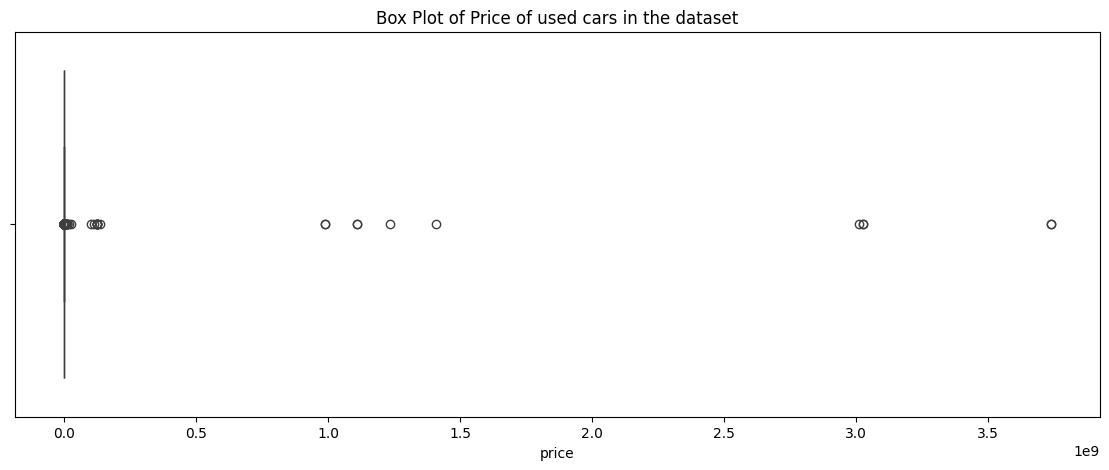

In [ ]:
#box plot of 'price' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='price').set(title="Box Plot of Price of used cars in the dataset")

In [ ]:
# Remove price outliers
# We'll keep the 10th percentile as the minimum price and $100,000 as the maximum price
min_price = data['price'].quantile(0.1)
max_price = 100000
data = data[(data['price'] >= min_price) & (data['price'] <= max_price)]

data.describe()

,price,year,odometer
count,331902.000000,330947.000000,3.302710e+05
mean,19565.445107,2010.896047,9.702026e+04
std,14320.833024,9.875464,1.879875e+05
min,1299.000000,1900.000000,0.000000e+00
25%,7995.000000,2008.000000,3.600400e+04
50%,16000.000000,2013.000000,8.500000e+04
75%,28071.000000,2017.000000,1.350720e+05
max,100000.000000,2022.000000,1.000000e+07


[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset')]

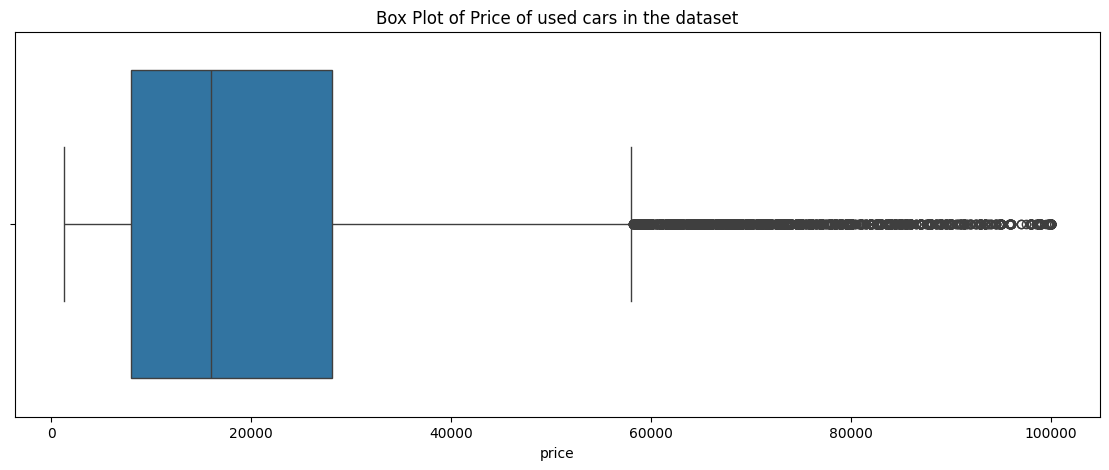

In [ ]:
#box plot of 'price' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='price').set(title="Box Plot of Price of used cars in the dataset")

##### b.Odometer

In [ ]:
# Remove odometer outliers
# We'll keep the 10th percentile as the minimum odometer reading and 500,000 as the maximum odometer reading
min_odometer = data['odometer'].quantile(0.1)
max_odometer = 500000
data = data[(data['odometer'] >= min_odometer) & (data['odometer'] <= max_odometer)]

# Convert to int
data.loc[:, 'odometer'] = data['odometer'].astype(int)

data.describe()

,price,year,odometer
count,296230.000000,295684.000000,296230.000000
mean,18206.512440,2010.685113,100928.042406
std,13375.630325,8.770332,61221.126604
min,1299.000000,1905.000000,14529.000000
25%,7500.000000,2008.000000,49158.000000
50%,14995.000000,2013.000000,94546.000000
75%,25997.000000,2016.000000,140163.750000
max,100000.000000,2022.000000,500000.000000


##### c. Year

In [ ]:
# Remove year outliers
# We'll remove cars made prior to 1960
data = data[data['year'] >= 1960]

# Convert to int
data.loc[:,'year'] = data['year'].astype(int)

data.describe()

,price,year,odometer
count,294585.000000,294585.000000,294585.000000
mean,18173.166203,2010.919052,101174.256384
std,13340.071167,7.883796,61239.854929
min,1299.000000,1960.000000,14529.000000
25%,7500.000000,2008.000000,49376.000000
50%,14995.000000,2013.000000,94953.000000
75%,25995.000000,2016.000000,140608.000000
max,100000.000000,2022.000000,500000.000000


#### Handling missing data

In [ ]:
data.isnull().sum()

,0
region,0
price,0
year,0
manufacturer,10076
condition,106440
cylinders,112969
fuel,1560
odometer,0
title_status,4487
transmission,1113


In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

region           0.00
price            0.00
year             0.00
manufacturer     3.42
condition       36.13
cylinders       38.35
fuel             0.53
odometer         0.00
title_status     1.52
transmission     0.38
drive           29.35
type            21.51
paint_color     27.50
state            0.00
dtype: float64


In [ ]:
# For the 'cylinders', 'fuel', 'transmission', 'drive', and 'type' columns,
# we'll fill the missing values with the most common value for rows with
# the same manufacturer and model who don't have missing values for these columns
columns_to_impute = ['cylinders', 'fuel', 'transmission', 'drive', 'type']

# Iterate through each column that needs imputation
for col in columns_to_impute:
    # Calculate the mode of each group
    mode_series = data.groupby(['manufacturer'])[col].transform(lambda x: x.mode()[0] if not x.mode().empty else x)

    # Fill missing values with mode of their respective groups
    data[col] = data[col].fillna(mode_series)

In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

region           0.00
price            0.00
year             0.00
manufacturer     3.42
condition       36.13
cylinders        1.44
fuel             0.04
odometer         0.00
title_status     1.52
transmission     0.01
drive            1.19
type             1.08
paint_color     27.50
state            0.00
dtype: float64


In [ ]:
# Identify columns where missing values are less than 7%
columns_to_drop = percent_missing_values[percent_missing_values < 7].index

# Drop rows with missing values in these selected columns
data.dropna(subset=columns_to_drop, inplace=True)

In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

region           0.00
price            0.00
year             0.00
manufacturer     0.00
condition       36.59
cylinders        0.00
fuel             0.00
odometer         0.00
title_status     0.00
transmission     0.00
drive            0.00
type             0.00
paint_color     26.59
state            0.00
dtype: float64


In [ ]:
# Drop rows with missing 'Cylinders' data
data.dropna(subset=['cylinders'], inplace=True)

In [ ]:
# Replace missing 'Conditions' with 'Unknown'
data.loc[:,'condition'] = data['condition'].fillna('Unknown')

In [ ]:
# Replace missing 'PaintColor' with the mode
data.loc[:,'paint_color'] = data['paint_color'].fillna(data['paint_color'].mode()[0])

In [ ]:
percent_missing_values = (data.isnull().sum() / data.shape[0] * 100).round(2)
print(percent_missing_values)

region          0.0
price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64


#### Encoding & Scaling the Dataset

In [ ]:
# Moving price to the last column in the dataset
price_column = data.pop('price')
data.insert(len(data.columns), 'price', price_column)

In [ ]:
# Selecting categorical and numerical features for appropriate processing
categorical_features = ['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
numerical_features = ['year', 'odometer', 'price']

In [ ]:
# Instantiate the LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Perform label encoding
encoded_features = data[categorical_features].apply(encoder.fit_transform)

In [ ]:
# Retrieve new column names from the encoder
encoded_columns = encoded_features.columns

In [ ]:
# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

In [ ]:
# Concatenate encoded features with the numerical columns to form the new dataframe
numerical_data = data[numerical_features]
encoded_df = pd.concat([encoded_df, numerical_data], axis=1)

In [ ]:
encoded_df.head()

,region,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state,year,odometer,price
27,16,14,3,6,2,0,2,0,8,10,1,2014.0,57923.0,33590
28,16,7,3,6,2,0,2,0,8,1,1,2010.0,71229.0,22590
29,16,7,3,6,2,0,2,0,8,8,1,2020.0,19160.0,39590
30,16,38,3,6,2,0,2,1,8,8,1,2017.0,41124.0,30990
31,16,13,1,5,2,0,0,2,10,0,1,2013.0,128000.0,15000


#### Create Trainig and Testing Datasets

In [ ]:
# Create training and testing datasets
X = encoded_df.drop('price', axis=1)
y = encoded_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = ['year', 'odometer']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [ ]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (224114, 13)
y_train Shape: (224114,)
X_test Shape: (56029, 13)
y_test Shape: (56029,)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Define a function to calculate scores for each model
def calculate_scores(y_test, y_pred):
    scores = []
    scores.append(round(r2_score(y_test, y_pred), 4))
    scores.append(round(r2_score(y_test, y_pred) * 100, 4))
    scores.append(round(mean_squared_error(y_test, y_pred), 4))
    scores.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    scores.append(round(mean_absolute_error(y_test, y_pred), 4))
    return scores

# Store results in a dataframe
scores_df = pd.DataFrame(columns=['Model', 'R^2 Score', 'Accuracy (%)', 'Mean Squared Error', 'Root MSE', 'Mean Absolute Error'])

#### Linear Regression

In [ ]:
# Create Linear Regression model, fit and predict
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
best_linear_regression_model = linear_regression
y_pred_linear_regression = best_linear_regression_model.predict(X_test)

# Calculate scores for Linear Regression
scores_linear_regression = calculate_scores(y_test, y_pred_linear_regression)
linear_regression_row = {'Model': 'Linear Regression', 'R^2 Score': scores_linear_regression[0], 'Accuracy (%)': scores_linear_regression[1], 'Mean Squared Error': scores_linear_regression[2], 'Root MSE': scores_linear_regression[3], 'Mean Absolute Error': scores_linear_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([linear_regression_row])], ignore_index=True, sort=False)

# Display scores for Linear Regression
print("Linear Regression Scores:")
print("R^2 Score:", scores_linear_regression[0])
print("Accuracy (%):", scores_linear_regression[1])
print("Mean Squared Error:", scores_linear_regression[2])
print("Root MSE:", scores_linear_regression[3])
print("Mean Absolute Error:", scores_linear_regression[4])

Linear Regression Scores:
R^2 Score: 0.54
Accuracy (%): 53.9973
Mean Squared Error: 81761877.0335
Root MSE: 9042.2274
Mean Absolute Error: 6559.3722


#### Lasso Regression

In [ ]:
# Create Lasso Regression model, fit and predict

# Define the range of alphas to test
alphas_lasso = np.logspace(-6, 1, 100)  # Testing 100 alphas from 10^-6 to 10^1

# Instantiate LassoCV
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42)

# Fit the LassoCV to the training data
lasso_cv.fit(X_train, y_train)

# Determine the best alpha
print("Best Alpha Using Built-in LassoCV: %f" % lasso_cv.alpha_)

# Predict on the testing set
best_lasso_regression_model = lasso_cv
y_pred_lasso_regression = best_lasso_regression_model.predict(X_test)

# Calculate scores for Lasso Regression
scores_lasso_regression = calculate_scores(y_test, y_pred_lasso_regression)
lasso_regression_row = {'Model': 'Lasso Regression', 'R^2 Score': scores_lasso_regression[0], 'Accuracy (%)': scores_lasso_regression[1], 'Mean Squared Error': scores_lasso_regression[2], 'Root MSE': scores_lasso_regression[3], 'Mean Absolute Error': scores_lasso_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([lasso_regression_row])], ignore_index=True)

# Display scores for Lasso Regression
print("Lasso Regression Scores:")
print("R^2 Score:", scores_lasso_regression[0])
print("Accuracy (%):", scores_lasso_regression[1])
print("Mean Squared Error:", scores_lasso_regression[2])
print("Root MSE:", scores_lasso_regression[3])
print("Mean Absolute Error:", scores_lasso_regression[4])

Best Alpha Using Built-in LassoCV: 0.385353
Lasso Regression Scores:
R^2 Score: 0.54
Accuracy (%): 53.9972
Mean Squared Error: 81761973.8615
Root MSE: 9042.2328
Mean Absolute Error: 6559.3575


#### Ridge Regression

In [ ]:
# Create Ridge Regression model, fit and predict

# Set a range of alpha to test
alphas_ridge = np.logspace(-6, 6, 13)  # Creates 13 logarithmically spaced alphas between 10^-6 and 10^6

# Instantiate RidgeCV with the alpha space and cv (cross-validation generator)
# Updated line to use store_cv_results
ridge_cv = RidgeCV(alphas=alphas_ridge, store_cv_results=True)

# Fit the RidgeCV model to the training data
ridge_cv.fit(X_train, y_train)

# The alpha and best score found
print("Best Alpha Using RidgeCV:", ridge_cv.alpha_)

# Predict with the best model
best_ridge_regression_model = ridge_cv
y_pred_ridge_regression = best_ridge_regression_model.predict(X_test)

# Calculate scores for Ridge Regression
scores_ridge_regression = calculate_scores(y_test, y_pred_ridge_regression)
ridge_regression_row = {'Model': 'Ridge Regression', 'R^2 Score': scores_ridge_regression[0], 'Accuracy (%)': scores_ridge_regression[1], 'Mean Squared Error': scores_ridge_regression[2], 'Root MSE': scores_ridge_regression[3], 'Mean Absolute Error': scores_ridge_regression[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([ridge_regression_row])], ignore_index=True)

# Display scores for Ridge Regression
print("Ridge Regression Scores:")
print("R^2 Score:", scores_ridge_regression[0])
print("Accuracy (%):", scores_ridge_regression[1])
print("Mean Squared Error:", scores_ridge_regression[2])
print("Root MSE:", scores_ridge_regression[3])
print("Mean Absolute Error:", scores_ridge_regression[4])

Best Alpha Using RidgeCV: 10.0
Ridge Regression Scores:
R^2 Score: 0.54
Accuracy (%): 53.9972
Mean Squared Error: 81761923.9087
Root MSE: 9042.23
Mean Absolute Error: 6559.3612


#### Random Forest (Base)

In [ ]:
# Create Random Forest (Base) model, fit and predict
random_forest_base = RandomForestRegressor(n_estimators=50, random_state=42)
random_forest_base.fit(X_train, y_train)
best_random_forest_base_model = random_forest_base
y_pred_random_forest_base = best_random_forest_base_model.predict(X_test)

# Calculate scores for Random Forest (Base)
scores_random_forest_base = calculate_scores(y_test, y_pred_random_forest_base)
random_forest_base_row = {'Model': 'Random Forest (Base)', 'R^2 Score': scores_random_forest_base[0], 'Accuracy (%)': scores_random_forest_base[1], 'Mean Squared Error': scores_random_forest_base[2], 'Root MSE': scores_random_forest_base[3], 'Mean Absolute Error': scores_random_forest_base[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([random_forest_base_row])], ignore_index=True)

# Display scores for Random Forest (Base)
print("Random Forest (Base) Scores:")
print("R^2 Score:", scores_random_forest_base[0])
print("Accuracy (%):", scores_random_forest_base[1])
print("Mean Squared Error:", scores_random_forest_base[2])
print("Root MSE:", scores_random_forest_base[3])
print("Mean Absolute Error:", scores_random_forest_base[4])

Random Forest (Base) Scores:
R^2 Score: 0.8795
Accuracy (%): 87.9528
Mean Squared Error: 21411841.8246
Root MSE: 4627.2931
Mean Absolute Error: 2557.2046


#### Random Forest (Optimized)

In [ ]:
# Create Random Forest (Optimized) model, fit and predict
random_forest_optimized = RandomForestRegressor(random_state=42)

# Define a parameter grid to search for best parameters
parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Use GridSearchCV to search for best parameters
grid_search = GridSearchCV(estimator=random_forest_optimized, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Use the best estimator to make predictions
best_random_forest_optimized_model = grid_search.best_estimator_
y_pred_random_forest_optimized = best_random_forest_optimized_model.predict(X_test)

# Calculate scores for Random Forest (Optimized)
scores_random_forest_optimized = calculate_scores(y_test, y_pred_random_forest_optimized)
random_forest_optimized_row = {'Model': 'Random Forest (Optimized)', 'R^2 Score': scores_random_forest_optimized[0], 'Accuracy (%)': scores_random_forest_optimized[1], 'Mean Squared Error': scores_random_forest_optimized[2], 'Root MSE': scores_random_forest_optimized[3], 'Mean Absolute Error': scores_random_forest_optimized[4]}
scores_df = pd.concat([scores_df, pd.DataFrame([random_forest_optimized_row])], ignore_index=True)

# Display scores for Random Forest (Optimized)
print("Random Forest (Optimized) Scores:")
print("R^2 Score:", scores_random_forest_optimized[0])
print("Accuracy (%):", scores_random_forest_optimized[1])
print("Mean Squared Error:", scores_random_forest_optimized[2])
print("Root MSE:", scores_random_forest_optimized[3])
print("Mean Absolute Error:", scores_random_forest_optimized[4])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 300}
Best Score (MSE): 23166924.18848637
Random Forest (Optimized) Scores:
R^2 Score: 0.8821
Accuracy (%): 88.2052
Mean Squared Error: 20963187.7987
Root MSE: 4578.5574
Mean Absolute Error: 2521.1619


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summary

In [ ]:
scores_df

,Model,R^2 Score,Accuracy (%),Mean Squared Error,Root MSE,Mean Absolute Error
0,Linear Regression,0.5400,53.9973,8.176188e+07,9042.2274,6559.3722
1,Linear Regression,0.5400,53.9973,8.176188e+07,9042.2274,6559.3722
2,Lasso Regression,0.5400,53.9972,8.176197e+07,9042.2328,6559.3575
3,Ridge Regression,0.5400,53.9972,8.176192e+07,9042.2300,6559.3612
4,Ridge Regression,0.5400,53.9972,8.176192e+07,9042.2300,6559.3612
5,Random Forest (Base),0.8795,87.9528,2.141184e+07,4627.2931,2557.2046
6,Random Forest (Optimized),0.8821,88.2052,2.096319e+07,4578.5574,2521.1619


#### Feature Importances

In [ ]:
# Calculate feature importances
features = []
importances = []
for name, importance in zip(X, best_random_forest_optimized_model.feature_importances_):
    features.append(name)
    importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features': features, 'Importance (%)': importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
11,year,39.68
12,odometer,16.74
3,cylinders,12.59
4,fuel,9.12
1,manufacturer,5.02
7,drive,3.86
8,type,3.11
10,state,2.47
0,region,2.25
2,condition,1.76


<ipython-input-66-d439b82e42bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")


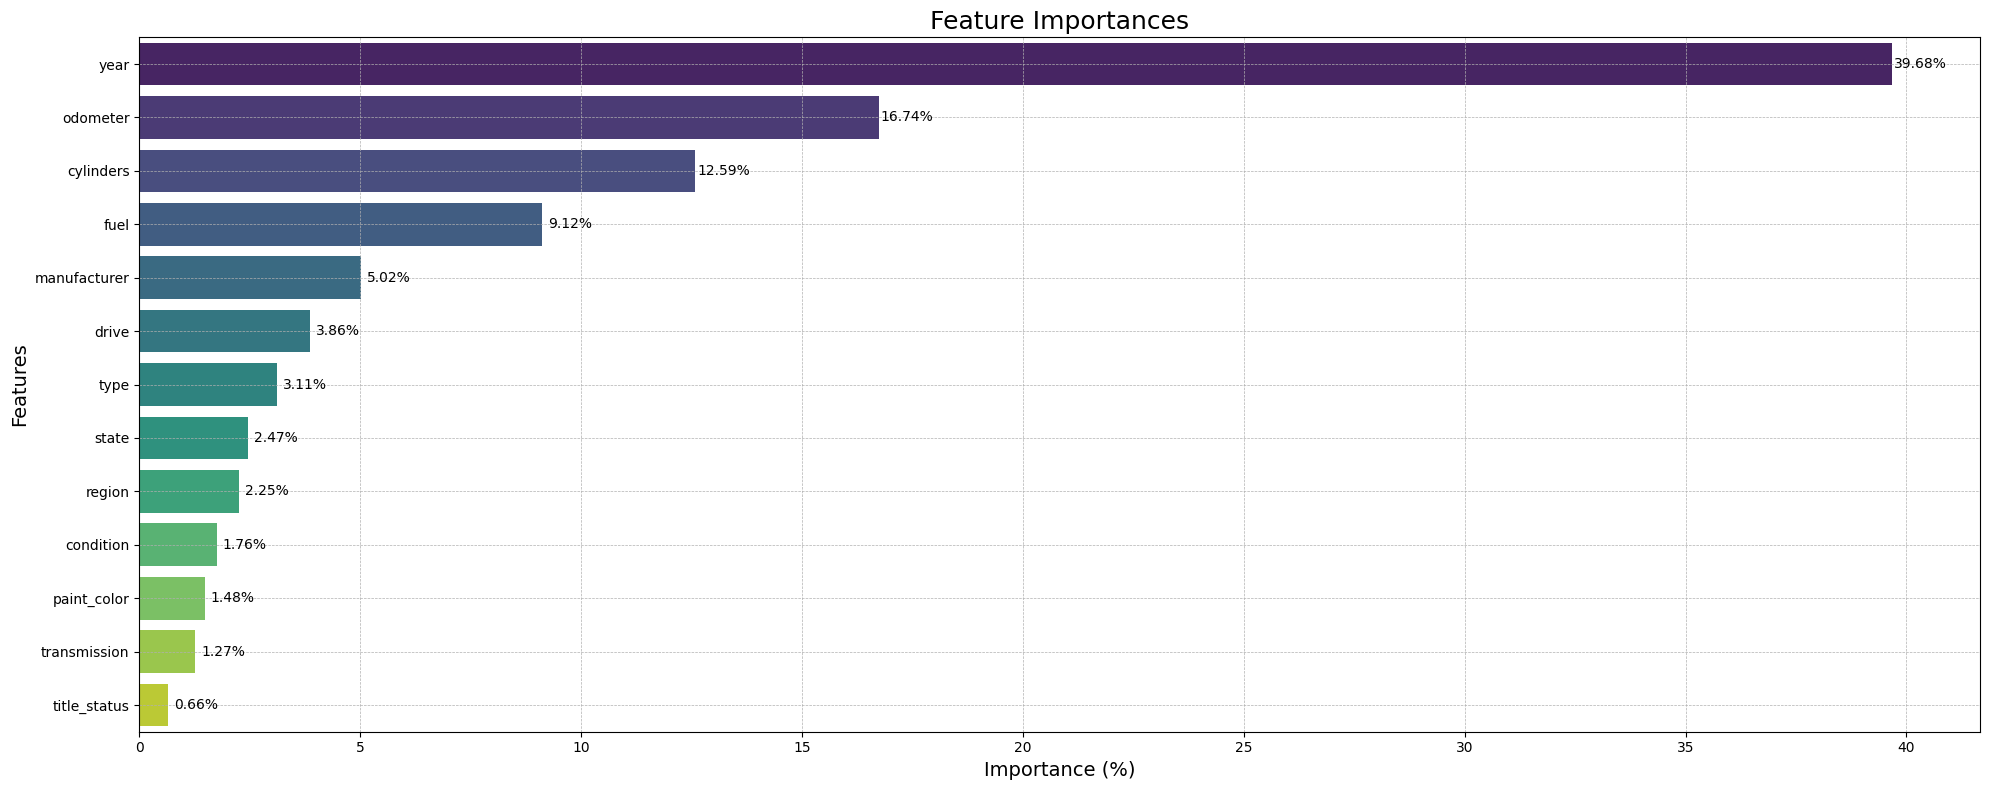

In [ ]:
# Plot feature importances
plt.figure(figsize=(20, 8))
# Sorting the features dataframe by 'Importance (%)' in descending order before plotting
features_sorted = features.sort_values(by='Importance (%)', ascending=False)
barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(f"{format(p.get_width(), '.2f')}%", (p.get_width() + 0.35, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.